# Machine Learning for Time Series Data in Python - Part 1

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn import linear_model

from sklearn.datasets import load_iris
from sklearn.datasets import load_boston

import librosa as lr
from glob import glob

## Time Series and Machine Learning Primer

### Plotting a time series (I)
In this exercise, you'll practice plotting the values of two time series without the time component.

Two DataFrames, data and data2 are available in your workspace.

Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

In [ ]:
# Print the first 5 rows of data
print(data.head())

In [ ]:
# Print the first 5 rows of data2
print(data2.head())

In [ ]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='values', ax=axs[0])
data2.iloc[:1000].plot(y='values', ax=axs[1])
plt.show()

### Plotting a time series (II)
You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called time). Let's see if this gives you some more context for understanding each time series data.

In [ ]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x='time', y='values', ax=axs[0])
data2.iloc[:1000].plot(x='time', y='values', ax=axs[1])
plt.show()

### Fitting a simple model: classification
In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model.

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [3]:
data = iris_df.loc[:130]
targets = iris_df.loc[130:]

In [4]:
# Construct data for the model
X = data[['petal length (cm)', 'petal width (cm)']]
y = data[['target']]

In [5]:
# Fit the model
model = LinearSVC()
model.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Predicting using a classification model
Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Information about petal width and length for several new flowers is stored in the variable targets. Using the classifier you fit, you'll predict the type of each flower.

In [6]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

In [7]:
# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

[2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


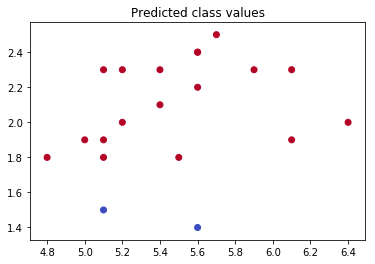

In [8]:
# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

### Fitting a simple model: regression
In this exercise, you'll practice fitting a regression model using data from the Boston housing market. A DataFrame called boston is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

* AGE: proportion of owner-occupied units built prior to 1940
* RM : average number of rooms per dwelling

In [18]:
boston = load_boston()

In [19]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
boston = boston_df
new_inputs = np.linspace(1,100)

In [21]:
# Prepare input and output DataFrames
X = boston[['AGE']]
y = boston[['RM']]

In [22]:
# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:539: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting using a regression model
Now that you've fit a model with the Boston housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.

A 1-D array new_inputs consisting of 100 "new" values for 'AGE' (proportion of owner-occupied units built prior to 1940) is available in your workspace along with the model you fit in the previous exercise.

In [23]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape(-1,1))

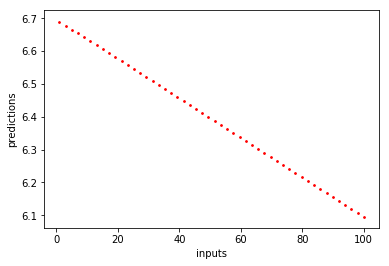

In [24]:
# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

### Inspecting the classification data
In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a [public Kaggle competition](https://www.kaggle.com/kinguistics/heartbeat-sounds).

In [28]:
data_dir = '../datasets/Heartbeat Sounds'

In [29]:
# List all the wav files in the folder
audio_files = glob(data_dir + '/*.wav')

In [30]:
# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

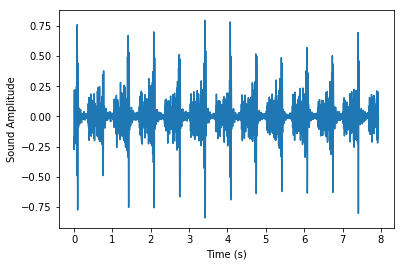

In [31]:
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

### Inspecting the regression data
The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a [public Kaggle competition](https://www.kaggle.com/dgawlik/nyse).

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.

In [37]:
# Read in the data
data = pd.read_csv('../datasets/stock/nyse.csv', index_col=0)

In [38]:
# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

              JNJ    JPM    XOM
date                           
2010-01-04  64.68  42.85  69.15
2010-01-05  63.93  43.68  69.42
2010-01-06  64.45  43.92  70.02
2010-01-07  63.99  44.79  69.80
2010-01-08  64.21  44.68  69.52


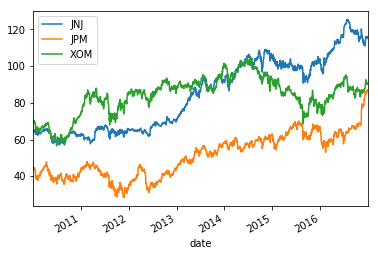

In [39]:
# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()